In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

#Read files from the website


In [2]:
def add(climate_data, url, name):
    data_city= pd.read_table(url, delim_whitespace=True, names=('Month', 'Day', 'Year', name))
    d1=data_city[['Month', 'Day', 'Year']]                       
    data_city['Date']=pd.to_datetime(d1)
    data_city=data_city[['Date',name]]
    climate_data=climate_data.merge(data_city, on = 'Date')
    return climate_data

In [3]:
N='AK_Anchorage_Temp'
url_1='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/AKANCHOR.txt'
data_Anchorage = pd.read_table(url_1, delim_whitespace=True, names=('Month', 'Day', 'Year', N))
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp
0,1,1,1995,23.2
1,1,2,1995,27.6
2,1,3,1995,32.0
3,1,4,1995,29.3
4,1,5,1995,30.1


In [4]:
data_Anchorage.shape

(9265, 4)

In [5]:
date1=data_Anchorage[['Month', 'Day', 'Year']]

In [6]:
data_Anchorage['Date']=pd.to_datetime(date1)

In [7]:
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp,Date
0,1,1,1995,23.2,1995-01-01
1,1,2,1995,27.6,1995-01-02
2,1,3,1995,32.0,1995-01-03
3,1,4,1995,29.3,1995-01-04
4,1,5,1995,30.1,1995-01-05


In [8]:
data_Anchorage=data_Anchorage[['Date','AK_Anchorage_Temp' ]]
data_Anchorage.head()
climate_data=data_Anchorage

In [9]:
url_2='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NDFARGO.txt'
climate_data=add(climate_data,url_2, 'ND_Fargo_Temp')

In [10]:
climate_data.head()

,Date,AK_Anchorage_Temp,ND_Fargo_Temp
0,1995-01-01,23.2,5.2
1,1995-01-02,27.6,10.1
2,1995-01-03,32.0,-3.8
3,1995-01-04,29.3,-6.3
4,1995-01-05,30.1,8.4


In [11]:
url_3=['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/FLWPALMB.txt', 'FL_West_Palm_Beach_Temp']
url_4= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/VTBURLIN.txt', 'Vermont_Burlington_Temp']
url_5= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/TXELPASO.txt', 'TX_El_Paso_Temp']
url_6 = ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WYCHEYEN.txt', 'Wyoming_Cheyenne_Temp']
url_7= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/CASANFRA.txt','San_Francisco_Temp']
url_8= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/OHCLEVEL.txt','Cleveland_Temp']
url_9= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WIMILWAU.txt','Milwaukee_Temp']
url_10= ['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NYBUFFAL.txt','NY_Bufallo_Temp']
url_11=['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/HIHONOLU.txt', 'Honolulu_Temp']
city_list=[url_3, url_4, url_5, url_6, url_7, url_8, url_9, url_10,url_11]

In [12]:
for url in city_list:
    climate_data=add(climate_data, url[0], url[1])
climate_data.shape

(9265, 12)

In [13]:
climate_data.head()

,Date,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp
0,1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,36.2,71.3
1,1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,28.4,72.5
2,1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,22.6,73.2
3,1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,15.2,71.9
4,1995-01-05,30.1,8.4,64.5,12.0,40.9,18.9,50.8,10.5,6.1,10.9,70.4


In [14]:
climate_data.isnull().sum()

Date                       0
AK_Anchorage_Temp          0
ND_Fargo_Temp              0
FL_West_Palm_Beach_Temp    0
Vermont_Burlington_Temp    0
TX_El_Paso_Temp            0
Wyoming_Cheyenne_Temp      0
San_Francisco_Temp         0
Cleveland_Temp             0
Milwaukee_Temp             0
NY_Bufallo_Temp            0
Honolulu_Temp              0
dtype: int64

In [15]:
climate_data.Date.dtype

dtype('<M8[ns]')

In [16]:
climate_data=climate_data.set_index(['Date'])
climate_data.head(10)

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp
Date,,,,,,,,,,,
1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,36.2,71.3
1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,28.4,72.5
1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,22.6,73.2
1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,15.2,71.9
1995-01-05,30.1,8.4,64.5,12.0,40.9,18.9,50.8,10.5,6.1,10.9,70.4
1995-01-06,26.8,5.4,71.7,21.0,47.3,22.8,49.3,22.9,22.3,21.0,73.6
1995-01-07,25.6,0.4,73.7,27.8,47.6,29.3,54.4,30.1,21.6,28.4,68.7
1995-01-08,18.1,5.5,62.1,22.1,47.7,37.2,54.9,23.0,13.9,22.2,69.5
1995-01-09,5.0,2.5,57.7,23.6,50.2,42.2,59.0,20.8,11.3,20.9,71.0


In [17]:
# Find the outliers in the temperature data

In [18]:
climate_data[climate_data['AK_Anchorage_Temp']<-60]

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,NY_Bufallo_Temp,Honolulu_Temp
Date,,,,,,,,,,,
1998-12-24,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-25,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-30,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-31,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1999-01-10,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-18,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-19,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-20,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-21,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [19]:
climate_data=climate_data.replace(-99, pd.NaT)

In [20]:
climate_data.isnull().sum()

AK_Anchorage_Temp          13
ND_Fargo_Temp              25
FL_West_Palm_Beach_Temp    25
Vermont_Burlington_Temp    22
TX_El_Paso_Temp            19
Wyoming_Cheyenne_Temp      16
San_Francisco_Temp         36
Cleveland_Temp             14
Milwaukee_Temp             55
NY_Bufallo_Temp            15
Honolulu_Temp              18
dtype: int64

In [21]:
#Show the data on graph to make sure there is no outliers.

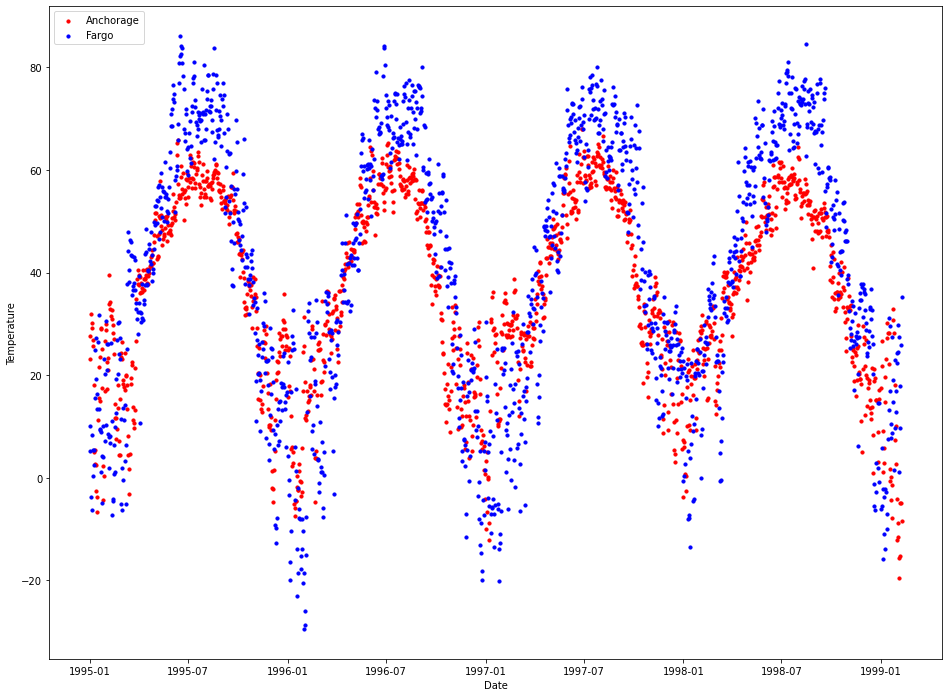

In [22]:
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter(climate_data.index[0:1500],climate_data['AK_Anchorage_Temp'][0:1500], s=10, c='r',label='Anchorage' )
plt.scatter(climate_data.index[0:1500],climate_data['ND_Fargo_Temp'][0:1500],s=10, c='b',label='Fargo' )
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

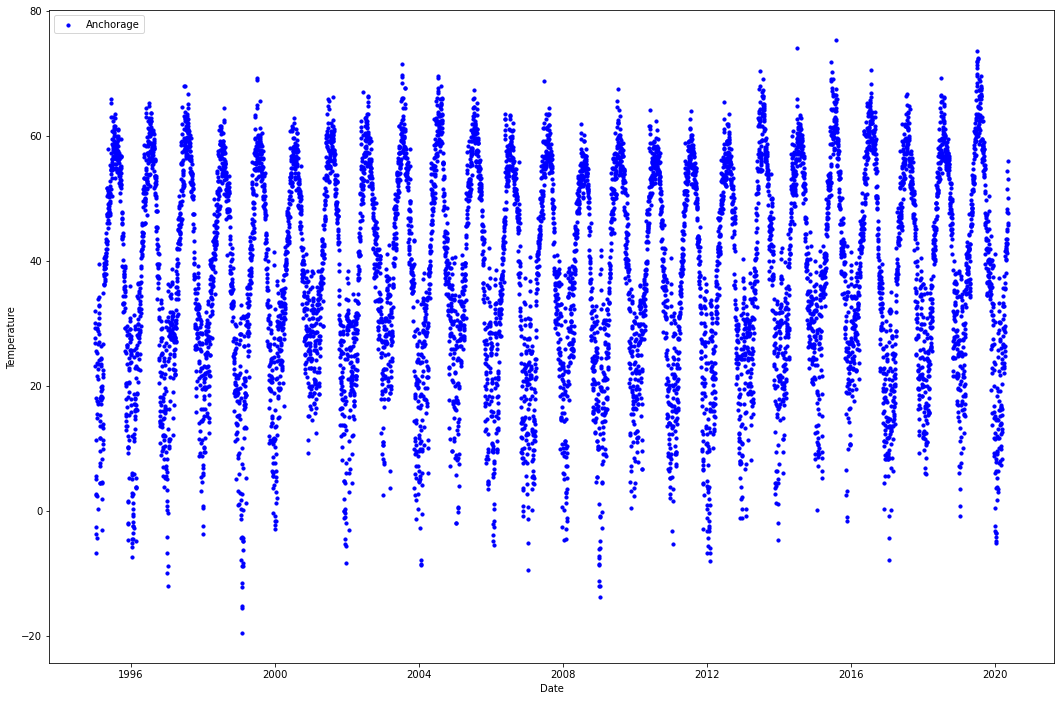

In [23]:
fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(climate_data.index ,climate_data['AK_Anchorage_Temp'],s=10, c='b', label='Anchorage')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

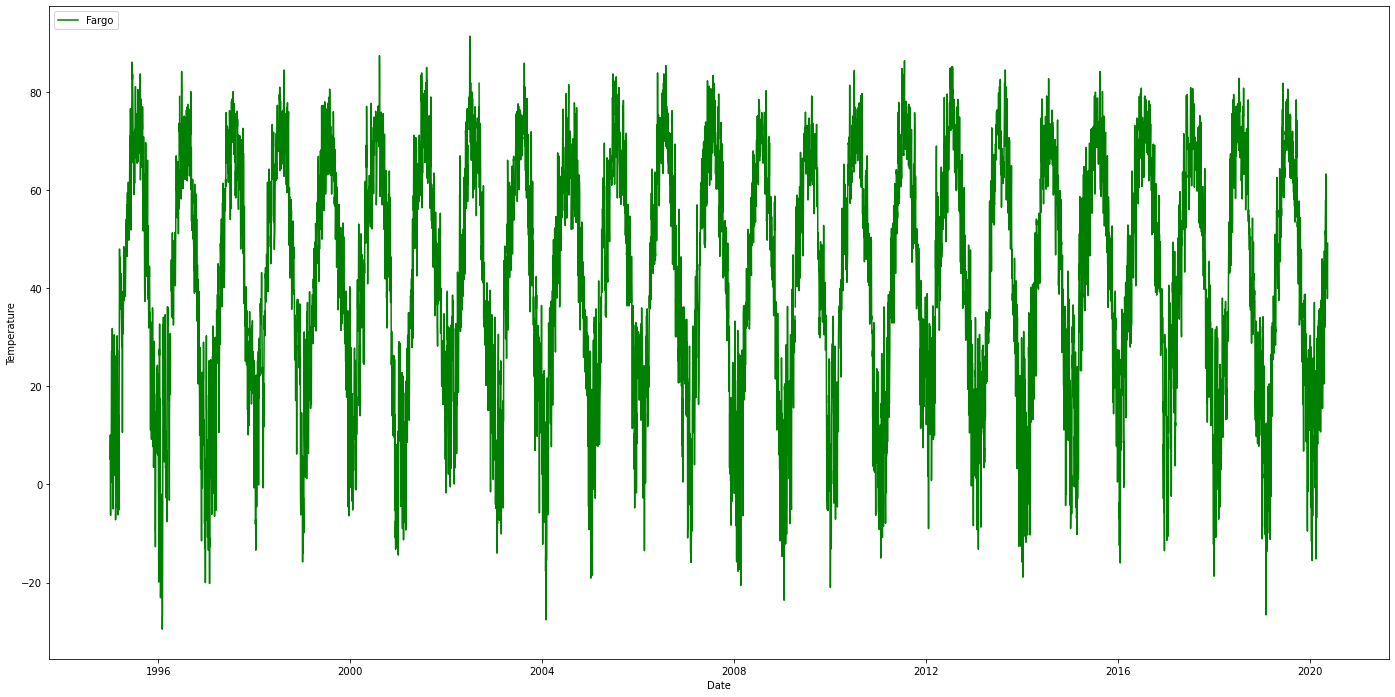

In [24]:
fig, ax = plt.subplots(figsize=(24,12))
ax.plot(climate_data.index ,climate_data['ND_Fargo_Temp'],c='g', label='Fargo')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

In [25]:
climate_data.mean()

AK_Anchorage_Temp          37.942650
ND_Fargo_Temp              42.695887
FL_West_Palm_Beach_Temp    75.717522
Vermont_Burlington_Temp    47.043720
TX_El_Paso_Temp            66.326595
Wyoming_Cheyenne_Temp      46.692280
San_Francisco_Temp         57.393835
Cleveland_Temp             51.562577
Milwaukee_Temp             48.547220
NY_Bufallo_Temp            48.844000
Honolulu_Temp              77.377257
dtype: float64

In [26]:
climate_data.AK_Anchorage_Temp .loc['1995-01-01':'1999-12-31'].mean()

36.741241076331654

In [27]:
climate_data.AK_Anchorage_Temp .loc['2015-01-01':'2019-12-31'].mean()

40.670262869660554

In [28]:
climate_data.ND_Fargo_Temp.loc['1995-01-01':'1999-12-31'].mean()

42.2158301158301

In [29]:
climate_data.ND_Fargo_Temp.loc['2015-01-01':'2019-12-31'].mean()

43.85071193866374

In [30]:
climate_data.FL_West_Palm_Beach_Temp.loc['1995-01-01':'1999-12-31'].mean()

75.19346512905008

In [31]:
climate_data.FL_West_Palm_Beach_Temp.loc['2015-01-01':'2019-12-31'].mean()

76.83044906900322